# Linear Algebra

Linear Algebra is a discipline where vector spaces and linear mapping between them are studied. In physics and astronomy, several phenomena can be readily written in terms of linear variables, what makes Computational Linear Algebra a very important topic to be covered throughout this course. We shall cover linear systems of equations, techniques for calculating inverses and determinants and factorization methods.

An interesting fact of Computational Linear Algebra is that it does not comprises numerical approaches as most of the methods are exact. The usage of a computer is then necessary because of the large number of calculations rather than the non-soluble nature of the problems. Numerical errors come then from round-off approximations.

- - -
- [Linear Systems of Equations](#Linear-Systems-of-Equations) 
    - [Matrices and vectors](#Matrices-and-vectors)
    - [Example 1](#Example-1)
    - [Matrices in Python](#Matrices-in-Python)
    - [Basic operations with matrices](#Basic-operations-with-matrices)
- [Gaussian Elimination](#Gaussian-Elimination)
    - [General Gaussian elimination](#General-Gaussian-elimination)
    - [Computing time](#Computing-time)
    - [Example 2](#Example-2)
- [Pivoting Strategies](#Pivoting-Strategies)
    - [Partial pivoting](#Partial-pivoting)
- [Matrix Inversion](#Matrix-Inversion)
- [Determinant of a Matrix](#Determinant-of-a-Matrix)
    - [Calculating determinants](#Calculating-determinants)
    - [Computing time of determinants](#Computing-time-of-determinants)
    - [Properties of determinants](#Properties-of-determinants)
- [LU Factorization](#LU-Factorization)
    - [Derivation of LU factorization](#Derivation-of-LU-factorization)
    - [Algorithm for LU factorization](#Algorithm-for-LU-factorization)

- - -

In [1]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation
#Interpolation add-on
import scipy.interpolate as interp

Populating the interactive namespace from numpy and matplotlib


- - - 

# Linear Systems of Equations

A linear system is a set of equations of $n$ variables that can be written in a general form:

$$ a_{11}x_1 + a_{12}x_2 + \cdots a_{1n}x_n = b_1 $$
$$\vdots$$
$$ a_{m1}x_1 + a_{m2}x_2 + \cdots a_{mn}x_n = b_m $$

where $n$ is, again, the number of variables, and $m$ the number of equations. 

A linear system has solution if and only if $m\geq n$. This leads us to the main objetive of a linear system, find the set $\{x_i\}_{i=0}^n$ that fulfills all the equations.

Although there is an intuitive way to solve this type of systems, by just adding and subtracting equations until reaching the desire result, the large number of variables of some systems found in physics and astronomy makes necessary to develop iterative and general approaches. Next, we shall introduce matrix and vector notation and some basic operations that will be the basis of the methods to be developed in this section.

## Matrices and vectors

A $m\times n$ matrix can be defined as a set of numbers arranged in columns and rows such as:

$$ A = [a_{ij}] = \left[ \matrix{
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & & \vdots\\
a_{m1} & a_{m2} & \cdots & a_{mn} 
}\right] $$

In the same way, it is possible to define a $n$-dimensional column vector as

$$ \textbf{x} = \left[ \matrix{
x_{1} \\
x_{2} \\
\vdots\\
x_{n} 
}\right] $$

and a row vector 

$$ \textbf{y} = \left[ \matrix{
y_{1} &
y_{2} &
\cdots &
y_{n} 
}\right] $$

The system of equations 

$$ a_{11}x_1 + a_{12}x_2 + \cdots a_{1n}x_n = b_1 $$
$$\vdots$$
$$ a_{m1}x_1 + a_{m2}x_2 + \cdots a_{mn}x_n = b_m $$

can be then written in a more convenient way as

$$ A \textbf{x} =  \left[ \matrix{
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & & \vdots\\
a_{m1} & a_{m2} & \cdots & a_{mn} 
}\right] 
\left[ \matrix{
x_{1} \\
x_{2} \\
\vdots\\
x_{n} 
}\right]  = b = 
\left[ \matrix{
b_{1} \\
b_{2} \\
\vdots\\
b_{n} 
}\right]$$

We can also introducing the $n\times (n+1)$ **augmented matrix** as

$$[A:\textbf{b}] =  \left[ \matrix{
a_{11} & a_{12} & \cdots & a_{1n} & \vdots & b_1 \\
a_{21} & a_{22} & \cdots & a_{2n} & \vdots & b_2 \\
\vdots & \vdots & & \vdots & \vdots & \vdots \\
a_{m1} & a_{n2} & \cdots & a_{nn} & \vdots & b_n
}\right]$$

## Example 1

Using Kirchhoff's circuit laws, it is possible to solve the next system:

![](https://raw.githubusercontent.com/sbustamante/ComputationalMethods/master/material/figures/circuit.png)

obtaining the next equations:

$$ I_A( R+4R ) - I_B( 4R ) = E $$
$$ -I_A( 4R ) + I_B( 4R + 3R ) - I_C(3R) = 0 $$
$$ -I_B( 3R ) + I_C(3R+2R) = -2E $$

Define the variables $x_1 = R I_A/E$, $x_2 = R I_B/E$ and $x_3 = R I_C/E$ and solve.

## Matrices in Python

One of the most useful advantages of high level languages like Python, is the manipulation of complex objects like matrices and vectors. For this part we are going to use advanced capabilities for handling matrices, provided by the library NumPy.

NumPy, besides the extreme useful NumPy array objects, also provides the Matrix objects that are overloaded with proper matrix operations.

In [2]:
#NumPy Arrays
M1 = np.array( [[5,-4,0],[-4,7,-3],[0,-3,5]] )
M2 = np.array( [[3,-2,1],[-1,5,4],[1,-2,3]] )
print M1, "\n"
print M2

[[ 5 -4  0]
 [-4  7 -3]
 [ 0 -3  5]] 

[[ 3 -2  1]
 [-1  5  4]
 [ 1 -2  3]]


In [3]:
#Addition
print M1+M2

[[ 8 -6  1]
 [-5 12  1]
 [ 1 -5  8]]


In [4]:
#Multiplication
print M1*M2

[[ 15   8   0]
 [  4  35 -12]
 [  0   6  15]]


In [5]:
#Division
print 1.0*M1/M2

[[ 1.66666667  2.          0.        ]
 [ 4.          1.4        -0.75      ]
 [ 0.          1.5         1.66666667]]


In [6]:
#NumPy Matrix
M1 = np.matrix( [[5,-4,0],[-4,7,-3],[0,-3,5]] )
M2 = np.matrix( [[3,-2,1],[-1,5,4],[1,-2,3]] )

print M1, "\n"
print M2

[[ 5 -4  0]
 [-4  7 -3]
 [ 0 -3  5]] 

[[ 3 -2  1]
 [-1  5  4]
 [ 1 -2  3]]


In [7]:
#Addition
print M1+M2

[[ 8 -6  1]
 [-5 12  1]
 [ 1 -5  8]]


In [8]:
#Multiplication
print M1*M2

[[ 19 -30 -11]
 [-22  49  15]
 [  8 -25   3]]


## Basic operations with matrices

In order to simplify following methods, we introduce here 3 basic operations over linear systems:

**1.** The $i$-th row $E_i$ can be multiplied by a non-zero constant $\lambda$, and then a new row used in place of $E_i$, i.e. $(\lambda E_i)\rightarrow (E_i)$. We denote this operation as $Lamb(E_i,\lambda)$.

**2.** The $j$-th row $E_j$ can be multiplied by a non-zero constant $\lambda$ and added to some row $E_i$. The resulting value take the place of $E_i$, i.e. $(E_i + \lambda E_j)\rightarrow (E_i)$. We denote this operation as $Comb(E_i,E_j,\lambda)$.

**3.** Finally, we define a swapping of two rows as $(E_i)\leftrightarrow (E_j)$, denoted as $Swap(E_i,E_j)$

## <font color='red'> Activity </font>

<font color='red'>
Write three routines that perform, given a matrix $A$, the previous operations over matrices:
</font>

<font color='red'>
 **row_lamb($i$, $\lambda$, $A$)**: $i$ is the row to be changed, $\lambda$ the multiplicative factor and A the matrix. This function should return the new matrix with the performed operation $(\lambda E_i)\rightarrow (E_i)$.
</font>

<font color='red'>
 **row_comb($i$, $j$ $\lambda$, $A$)**: $i$ is the row to be changed, $j$ the row to be added, $\lambda$ the multiplicative factor and A the matrix. This function should return the new matrix with the performed operation $(E_i + \lambda E_j)\rightarrow (E_i)$.
</font>

<font color='red'>
 **row_swap($i$, $j$, $A$)**: $i$ and $j$ are the rows to be swapped. This function should return the new matrix with the performed operation $(E_i)\leftrightarrow (E_j)$.
</font>

In [9]:
#Lambda function
def row_lamb( i, lamb, A ):
    B = np.copy(A)
    B[i] = lamb*B[i]
    return B

#Combination function
def row_comb( i, j, lamb, A ):
    B = np.copy(A)
    B[i] = lamb*B[j] + B[i]
    return B

#Swap function
def row_swap( i, j, A ):
    B = np.copy(A)
    B[[i,j]] = B[[j,i]]
    return B

- - -

# Gaussian Elimination

A first method to solve linear systems of equations is the Gaussian elimination. This procedure consists of a set of recursive steps performed in order to diagonalise the matrix of the problem. A suitable way to introduce this method is applying it to some basic problem. To do so, let's take the result of the [Example 1](#Example-1):

$$ \left[ \matrix{
5 & -4 & 0 \\
-4 & 7 & -3 \\ 
0 & -3 & 5
}\right] 
\left[ \matrix{
x_{1} \\
x_{2} \\
x_{3} 
}\right]  =
\left[ \matrix{
1 \\
0 \\
-2
}\right]$$

Constructing the associated augmented matrix, we obtain

$$ \left[ \matrix{
5 & -4 & 0 & \vdots & 1 \\
-4 & 7 & -3 & \vdots & 0 \\
0 & -3 & 5 & \vdots & -2
}\right] $$

At this point, we can eliminate the coefficients of the variable $x_1$ in the second and third equations. For this, we apply the operations $Comb(E_2,E_1,4/5)$. The coefficient in the third equation is already null. We then obtain:

$$ \left[ \matrix{
5 & -4 & 0 & \vdots & 1 \\
0 & 3.8 & -3 & \vdots & 0.8 \\
0 & -3 & 5 & \vdots & -2
}\right] $$

Now, we proceed to eliminate the coefficient of $x_2$ in the third equation. For this, we apply again $Comb(E_3,E_2,0.789)$, where $3/3.8 = 0.789$.

$$ \left[ \matrix{
5 & -4 & 0 & \vdots & 1 \\
0 & 3.8 & -3 & \vdots & 0.8 \\
0 & 0 & 2.632 & \vdots & -1.368
}\right] $$

The final step is to solve for $x_3$ in the last equation, doing the operation $Lamb(E_3,1/2.632)$, yielding:

$$ \left[ \matrix{
5 & -4 & 0 & \vdots & 1 \\
0 & 3.8 & -3 & \vdots & 0.8 \\
0 & 0 & 1 & \vdots & -0.520
}\right] $$

From this, it is direct to conclude that $x_3 = -0.502$, for $x_2$ and $x_1$ it is only necessary to replace the found value of $x_3$.

## <font color='red'> Activity </font>

<font color='red'>
Using the three routines written in the previous activity, reproduce the last steps for the matrix of the Example 1.
</font>

## General Gaussian elimination

Now, we shall describe the general procedure for Gaussian elimination: 

**1.** Give an augmented matrix $\hat{A}=[A:\textbf{b}]$.

**2.** Find the first non-zero coefficient $a_{i1}$ associated to $x_1$. This element is called **pivot**.

**3.** Apply the operation $Swap(E_1,E_i)$. This guarantee the first row has a non-zero coefficient $a_{11}$.

**4.** Apply the operation $Comb(E_j,E_1,-a_{j1}/a_{11})$. This eliminates the coefficients associated to $x_1$ in all the rows but in the first one.

**5.** Repeat steps **2** to **4** but for the coefficients of $x_2$ and then $x_3$ and so up to $x_n$. When iterating the coefficients of $x_{k}$, do not take into account the first $k$-th rows as they are already sorted.

**6.** Once you obtain a diagonal form of the matrix, apply the operation $Lamb(E_n,1/a_{nn})$. This will make the coefficient of $x_n$ in the last equation equal to 1.

**7.** The final result should be an augmented matrix of the form:

$$\left[ \matrix{
a_{11} & a_{12} & \cdots & a_{1(n-1)} & a_{1n} & \vdots & \hat b_1 \\
0 & a_{22} & \cdots & a_{2(n-1)} & a_{2n} & \vdots & \hat b_2 \\
\vdots & \vdots &  & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \cdots & a_{(n-1)(n-1)} & a_{(n-1)n} & \vdots & \hat b_{n-1} \\
0 & 0 & \cdots & 0 & 1 & \vdots & \hat b_n
}\right]$$

**8.** The solution to the problem is then obtained through backward substitutions, i.e.

$$x_n = \hat b_n$$
$$ x_{n-1} =  \frac{\hat b_{n-1} + a_{(n-1)n}x_n}{a_{(n-1)(n-1)}}$$
$$\vdots$$
$$x_i = \frac{\hat b_i - \sum_{j=i+1}^n a_{ij}x_j}{a_{ii}}\ \ \ \ \mbox{for}\ \ \ i=n-1, n-2, \cdots, 1$$

In [10]:
#Gaussian Elimination
def Gaussian_Elimination( A0 ):
    #Making local copy of matrix
    A = np.copy(A0)
    #Detecting size of matrix
    n = len(A)
    
    #Sweeping all the columns in order to eliminate coefficients of the i-th variable
    for i in xrange( 0, n ):
        
        #Sweeping all the rows for the i-th column in order to find the first non-zero coefficient
        for j in xrange( i, n ):
            if A[i,j] != 0:
                #Normalization coefficient
                Norm = 1.0*A[i,j]
                break
                
        #Applying swap operation to put the non-zero coefficient in the i-th row
        A = row_swap( i, j, A )
        
        #Eliminating the coefficient associated to the i-th variable
        for j in xrange( i+1, n ):
            A = row_comb( j, i, -A[j,i]/Norm, A )
            
    #Normalizing n-th variable
    A = row_lamb( n-1, 1.0/A[n-1,n-1], A )
    
    #Finding solution
    x = np.zeros( n )
    x[n-1] = A[n-1,n]
    for i in xrange( n-1, -1, -1 ):
        x[i] = ( A[i,n] - sum(A[i,i+1:n]*x[i+1:n]) )/A[i,i]
    
    #Upper diagonal matrix and solutions x
    return A, x

In [19]:
#Generating random matrix
M = np.matrix( np.random.random( (4,5) ) )
print "Augmented Matrix M:\n", M, "\n"
#Solving using Gaussian Elimination
D, x = Gaussian_Elimination(M)
print "Augmented Diagonal Matrix D:\n", D, "\n"
print "Obtained solution:\n", x, "\n"
print "Exact solution:\n", (M[:,:4]**-1*M[:,4]).T, "\n"

Augmented Matrix M:
[[ 0.04759125  0.5864322   0.16562231  0.78146926  0.59889558]
 [ 0.19002336  0.68560789  0.0187903   0.31580233  0.38054719]
 [ 0.22262149  0.55058898  0.30301365  0.32507133  0.65829969]
 [ 0.68923963  0.34756106  0.99878085  0.9631757   0.52560502]] 

Augmented Diagonal Matrix D:
[[ 0.04759125  0.5864322   0.16562231  0.78146926  0.59889558]
 [ 0.         -1.65591126 -0.64251003 -2.804465   -2.01073598]
 [ 0.          0.          0.37902425  0.38295606  0.51923769]
 [ 0.          0.          0.          1.         -0.40261622]] 

Obtained solution:
[-1.85797287  1.20676468  1.77672538 -0.40261622] 

Exact solution:
[[-1.85797287  1.20676468  1.77672538 -0.40261622]] 



## Computing time

As mentioned before, Algebra Linear methods do not invole numerical approximations excepting round-off errors. This implies the computing time depends on the number of involved operations (multiplications, divisions, additions and subtractions). It is possible to demonstrate that the numbers of required divisions/multiplications is given by:

$$\frac{n^3}{3}+n^2-\frac{n}{3}$$

and the required additions/subtractions:

$$\frac{n^3}{3}+\frac{n^2}{2}-\frac{5n}{6}$$

These numbers are calculated separately as the computing time per operation for divisions and multiplications are similar and much larger than computing times for additions and subtractions. According to this, the overall computing time, for large $n$, scales as $n^3$/3.

## Example 2

Using the library `datetime` of python, evaluate the computing time required for `Gaussian_Elimination` to find the solution of a system of $n=20$ equations and $20$ unknowns. For this purpose you can generate random systems. For a more robust result, repeat $500$ times, give a mean value and plot an histrogram of the computing times.

The mean computing time for a 20x20 matrix is: 2762.628000 microseconds


2762.6280000000002

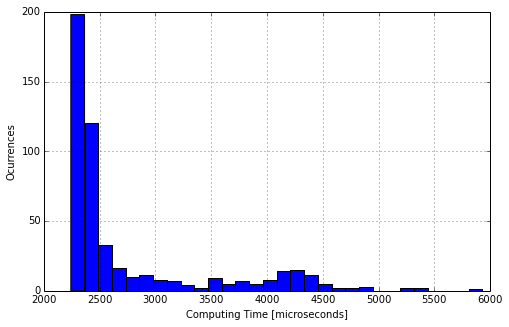

In [12]:
#Importing datatime
from datetime import datetime

#Number of repeats
Nrep = 500
#Size of matrix
n = 20

def Gaussian_Time( n, Nrep ):
    #Arrays of times
    Times = []
    #Cicle for number of repeats
    for i in xrange(Nrep):
        #Generating random matrix
        M = np.matrix( np.random.random( (n,n+1) ) )
        
        #Starting time counter
        tstart = datetime.now()
        #Invoking Gaussian Elimination routine
        Gaussian_Elimination(M)
        #Killing time counter
        tend = datetime.now()
        
        #Saving computing time
        Times.append( (tend-tstart).microseconds )
        
    #Numpy Array
    Times = np.array(Times)
    
    print "The mean computing time for a %dx%d matrix is: %lf microseconds"%(n,n,Times.mean())
    
    #Histrogram
    plt.figure( figsize=(8,5) )
    histo = plt.hist( Times, bins = 30 )
    plt.xlabel( "Computing Time [microseconds]" )
    plt.ylabel( "Ocurrences" )
    plt.grid()
    
    return Times.mean()
    
    
Gaussian_Time( n, Nrep )

## <font color='red'> Activity </font>

<font color='red'>
Using the previous code, estimate the computing time for random matrices of size $n=5,10,50,100,500,1000$. For each size, compute $500$ times in order to reduce spurious errors. Plot the results in a figure of $n$ vs computing time. Is it verified the some of scaling laws (Multiplication/Division or Addition/Sustraction). Note that for large values of $n$, both scaling laws converge to the same.
</font>

- - -

# Pivoting Strategies

The previous method of Gaussian Elimination for finding solutions of linear systems is mathematically exact, however round-off errors that appear in computational arithmetics can represent a real problem when high accuracy is required.

In order to illustrate this, consider the next situation:

$$ E_1: 0.00300x_1 + 59.14x_2 = 59.17 $$
$$ E_2: 5.291x_1 - 6.130x_2 = 46.78 $$

Using four-digit arithmetic we obtain:

**1.** Constructing the augmented matrix:

$$ \left[ \matrix{
0.003 & 59.14 & \vdots & 59.17 \\
5.291 & -6.130 & \vdots & 46.78
}\right] $$

**2.** Applying the reduction with the first pivot, we obtain:

$$(E_1 + m E_2)\rightarrow (E_1)$$

where:

$$m = -\frac{a_{21}}{a_{11}} = -\frac{5.291}{0.003} = 1763.666\cdots \approx 1764$$

In this step, we have taken the first four digits. This leads us to:

$$ \left[ \matrix{
0.003 & 59.14 & \vdots & 59.17 \\
0 & -104300 & \vdots & -104400
}\right] $$

The exact system is instead

$$ \left[ \matrix{
0.003 & 59.14 & \vdots & 59.17 \\
0 & -104309.37\bar{6} & \vdots & -104309.37\bar{6}
}\right] $$

Using the solution $x_2 \approx 1.001$, we obtain

$$ x_1 \approx \frac{59.17 - (59.14)(1.001)}{0.00300} = -10 $$

The exact solution is however:

$$ x_1 = 10.00 $$

The source of such a large error is that the factor $59.14/0.00300 \approx 20000$. This quantity is propagated through the combination steps of the Gaussian Elimination, yielding a complete wrong result.

## Partial pivoting

A suitable method to reduce round-off errors is to choose a pivot more conveniently. As we saw before, a small pivot generally implies larger propagated errors as they appear usually as dividends. The partial pivoting method consists then of a choosing of the largest absolute coefficient associated to $x_i$ instead of the first non-null one, i.e.

$$ |a_{ii}| = \max_{i\leq j\leq n}|a_{ji}| $$

This way, propagated multiplication errors would be minimized.

## <font color='red'> Activity </font>

<font color='red'>
Create a new routine `Gaussian_Elimination_Pivoting` from `Gaussian_Elimination` in order to include the partial pivoting method. Compare both routines with some random matrix and with the exact solution.
</font>

- - -

# Matrix Inversion

Asumming a nonsingular matrix $A$, if a matrix $A^{-1}$ exists, with $AA^{-1} = I$ and $A^{-1}A = I$, where $I$ is the identity matrix, then $A^{-1}$ is called the inverse matrix of $A$. If such a matrix does not exist, $A$ is said to be a singular matrix.

A corollary of this definition is that $A$ is also the inverse matrix of $A^{-1}$.

Once defined the Gaussian Elimination method, it is possible to extend it in order to find the inverse of any nonsingular matrix.
Let's consider the next equation:

$$ AA^{-1} = AB= \left[ \matrix{
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & & \vdots\\
a_{m1} & a_{n2} & \cdots & a_{nn} 
}\right]\left[ \matrix{
b_{11} & b_{12} & \cdots & b_{1n} \\
b_{21} & b_{22} & \cdots & b_{2n} \\
\vdots & \vdots & & \vdots\\
b_{n1} & b_{n2} & \cdots & b_{nn} 
}\right] = 
\left[ \matrix{
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & 1
}\right]$$

This can be rewritten as a set of $n$ systems of equations, i.e.

$$ \left[ \matrix{
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & & \vdots\\
a_{n1} & a_{n2} & \cdots & a_{nn} 
}\right]\left[ \matrix{
b_{11} \\
b_{21} \\
\vdots \\
b_{n1}
}\right] = 
\left[ \matrix{
1 \\
0 \\
\vdots \\
0
}\right],$$

$$\left[ \matrix{
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & & \vdots\\
a_{n1} & a_{n2} & \cdots & a_{nn} 
}\right]\left[ \matrix{
b_{12} \\
b_{22} \\
\vdots \\
b_{n2}
}\right] = 
\left[ \matrix{
0 \\
1 \\
\vdots \\
0
}\right]$$

$$\vdots$$ 
$$\left[ \matrix{
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & & \vdots\\
a_{n1} & a_{n2} & \cdots & a_{nn} 
}\right]\left[ \matrix{
b_{1n} \\
b_{2n} \\
\vdots \\
b_{nn}
}\right] = 
\left[ \matrix{
0 \\
0 \\
\vdots \\
1
}\right]$$

These systems can be solved individually by using Gaussian Elimination, however we can mix all the problems, obtaining the augmented matrix:

$$\left[ \matrix{
a_{11} & a_{12} & \cdots & a_{1n} & \vdots & 1 & 0 & \cdots & 0 \\
a_{21} & a_{22} & \cdots & a_{2n} & \vdots & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots\\
a_{n1} & a_{n2} & \cdots & a_{nn} & \vdots & 0 & 0 & \cdots & 1
}\right]$$

Now, applying Gaussian Elimination we can obtain a upper diagonal form for the first matrix. Completing the steps using forwards elimination we can convert the first matrix into the identity matrix, obtaining 

$$\left[ \matrix{
1 & 0 & \cdots & 0 & \vdots & b_{11} & b_{12} & \cdots & b_{1n} \\
0 & 1 & \cdots & 0 & \vdots & b_{21} & b_{22} & \cdots & b_{2n} \\
\vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots & & \vdots\\
0 & 0 & \cdots & 1 & \vdots & b_{n1} & b_{n2} & \cdots & b_{nn}
}\right]$$

Where the second matrix is then the inverse $B=A^{-1}$.

## <font color='red'> Activity </font>

<font color='red'>
Using the previous routine `Gaussian_Elimination_Pivoting`, create a new routine `Inverse` that calculates the inverse of any given squared matrix.
</font>

- - -

# Determinant of a Matrix

The determinant of a matrix is a scalar quantity calculated for square matrix. This provides important information about the matrix of coefficients of a system of linear of equations. For example, any system of $n$ equations and $n$ unknowns has an unique solution if the associated determinant is nonzero. This also implies the determinant allows to evaluate whether a matrix is singular or nonsingular.

## Calculating determinants

Next, we shall define some properties of determinants that will allow us to calculate determinants by using a recursive code:

**1.** If $A = [a]$ is a $1\times 1$ matrix, its determinant is then $\det A = a$.

**2.** If $A$ is a $n\times n$ matrix, the minor matrix $M_{ij}$ is the determinant of the $(n-1)\times(n-1)$ matrix obtained by deleting the $i$th row and the $j$th column.

**3.** The cofactor $A_{ij}$ associated with $M_{ij}$ is defined by $A_{ij} = (-1)^{i+j}M_{ij}$.

**4.** The determinant of a $n\times n$ matrix $A$ is given by:

$$ \det A = \sum_{j=1}^n a_{ij}A_{ij} $$

or 

$$ \det A = \sum_{i=1}^n a_{ij}A_{ij} $$

This is, it is possible to use both, a row or a column for calculating the determinant.

In [13]:
#Determinant of a Matrix
def Determinant( A0 ):
    #Local copy of matrix
    A = np.copy(A0)
    #Size of matrix
    n = len(A)
    
    #How to be swept
    i = 0
    
    #Detecting 1x1 matrices
    if n==1:
        return A[0][0]
    #Detecting nxn matrices
    else:
        #Cumulative variable
        determ = 0
        for j in xrange(n):
            determ += (-1)**(i+j)*A[i,j]*determinant( A[delete(range(n),i)][:,delete(range(n),j)] )
        return determ

In [14]:
#Generating random matrix
M = np.matrix( np.random.random( (4,4) ) )
print "Matrix nxn A:\n", M, "\n"
print "Determinant by our method D:\n", Determinant( M ), "\n"
print "Determinant by NumPy method D:\n", det( M ), "\n"

Matrix nxn A:
[[ 0.37958345  0.47403548  0.67939948  0.21525605]
 [ 0.62765007  0.62237439  0.53549702  0.14357914]
 [ 0.58476546  0.56165553  0.37870035  0.18926523]
 [ 0.48698377  0.83138615  0.08066257  0.58164345]] 

Determinant by our method D:
-0.00776752447634 

Determinant by NumPy method D:
-0.00776752447634 



## Computing time of determinants

Using the previous recurrence, we can calculate the computing time of the previous algorithm. First, let's consider the number of required operations for a $2\times 2$ matrix: let $A$ be a $2\times 2$ matrix given by:

$$ A = \left[ \matrix{
a_{11} & a_{12} \\
a_{21} & a_{22}}\right]$$

The determinant is then given by:

$$det(A) = a_{11}a_{22} - a_{12}a_{21}$$

the number of required multiplications was $2$ and subtractions is $1$.

Now, using the previous formula for the determinant

$$ \det A = \sum_{j=1}^n a_{ij}A_{ij} $$

For a $3\times 3$ matrix, it is necessary to calculate $3$ times $2\times 2$ determinants. Besides, it is necessary to multiply the cofactor $A_{ij}$ with the coefficient $a_{ij}$, that leads us with $t_{n=3}=3\times 2 + 3$ multiplications. Additions are not important as their computing time is far less than multiplications.

For a $4\times 4$ matrix, we need four deteminants of $3\times 3$ submatrices, leading $t_{n=4} = 4\times( 3\times 2 + 3 ) + 4 = 4! + \frac{4!}{2!} + \frac{4!}{3!}$. In general, for a $n\times n$ matrix, we have then:

$$ t_{n} = \frac{n!}{(n-1)!} + \frac{n!}{(n-2)!} + \cdots + \frac{n!}{1!} = n!\left( \sum_{i=1}^{n-1}\frac{1}{i!} \right)$$

If $n$ is large enough, we can approximate $t_{n}\approx n!$.

In computers, this is a prohibitive computing time so other schemes have to be proposed.

## <font color='red'> Activity </font>

<font color='red'>
Evaluate the computing time of the `Determinant` routine for matrix sizes of $n=1,2,3,\cdots,10$ and doing several repeats. Plot your result ($n$ vs $t_n$). What can you conclude about the behaviour of the computing time?
</font>

## Properties of determinants

Determinants have a set of properties that can reduce considerably computing times. Suppose $A$ is a $n\times n$ matrix:

**1.** If any row or column of $A$ has only zero entries, then $\det A = 0$.

**2.** If two rows or columns of $A$ are the same, then $\det A = 0$.

**3.** If $\hat A$ is obtained from $A$ by using a swap operation $(E_i)\leftrightarrow (E_j)$, then $\det \hat A=-\det A$.

**4.** If $\hat A$ is obtained from $A$ by using a escalation operation $(\lambda E_i)\leftrightarrow (E_i)$, then $\det \hat A=\lambda \det A$.

**5.** If $\hat A$ is obtained from $A$ by using a combination operation $(E_i+\lambda E_j) \leftrightarrow (E_i)$, then $\det \hat A=\det A$.

**6.** If $B$ is also a $n\times n$ matrix, then $\det(AB)=(\det A)(\det B).$

**7.** $\det A^t=\det A.$

**8.** $\det A^{-1}=(\det A)^{-1}$

**9.** Finally and most importantly: if $A$ is an upper, lower or diagonal matrix, then:

$$ det A = \prod_{i=1}^n a_{ii} $$

As we analysed before, Gaussian Elimination takes a computing time scaling like $n^3$ for large matrix sizes. According to the previous properties, the determinant of a upper diagonal matrix just takes $n-1$ multiplications, far less than a nondiagonal matrix. Combining these properties, we can track back and relate the determinant of the resulting upper diagonal matrix and the original one. Leading us to a computing time scaling like $n^3$, much better than the original $n!$.

## <font color='red'> Activity </font>

<font color='red'>
Using the `Gaussian_Elimination` routine and tracking back the performed operations, construct a new routine called `Gaussian_Determinant`. Make the same analysis of the computing time as the previous activity. Compare both results.
</font>

- - -

# LU Factorization

As we saw before, the Gaussian Elimination algorithm takes a computing time scaling as $\mathcal{O}(n^3/3)$ in order to solve a system of $n$ equations and $n$ unknowns. Let's assume a system of equations $\mathbf{A}\mathbf{x} = \mathbf{b}$ where $\mathbf{b}$ is already in upper diagonal form. 

$$\left[ \matrix{
a_{11} & a_{12} & \cdots & a_{1(n-1)} & a_{1n} & \vdots & \hat b_1 \\
0 & a_{22} & \cdots & a_{2(n-1)} & a_{2n} & \vdots & \hat b_2 \\
\vdots & \vdots &  & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \cdots & a_{(n-1)(n-1)} & a_{(n-1)n} & \vdots & \hat b_{n-1} \\
0 & 0 & \cdots & 0 & a_{nn} & \vdots & \hat b_n
}\right]$$

The Gauss-Jordan algorithm can reduce even more this problem in order to solve it directly, yielding:

$$\left[ \matrix{
1 & 0 & \cdots & 0 & 0 & \vdots & x_1 \\
0 & 1 & \cdots & 0 & 0 & \vdots & x_2 \\
\vdots & \vdots &  & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \cdots & 1 & 0 & \vdots & x_{n-1} \\
0 & 0 & \cdots & 0 & 1 & \vdots & x_n
}\right]$$

From the upper diagonal form to the completely reduced one, it is necessary to perform $n+(n-1)+(n-2)+\cdots\propto n(n-1)$ backwards substitutions. The computing time for solving a upper diagonal system is then $\mathcal{O}(n^2)$.


Now, let $\mathbf{A}\mathbf{x} = \mathbf{b}$ be a general system of equations of $n$ dimensions. Let's assume $\mathbf{A}$ can be written as a multiplication of two matrices, one lower diagonal $\mathbf{L}$ and other upper diagonal $\mathbf{U}$, such that $\mathbf{A}=\mathbf{L}\mathbf{U}$. Defining a vector $\mathbf{y} = \mathbf{U}\mathbf{x}$, it is obtained for the original system 

$$ \mathbf{A} \mathbf{x}=\mathbf{L}(\mathbf{U}\mathbf{x}) = \mathbf{L}\mathbf{y} = \mathbf{b}$$

For solving this system we can then:

**1.** Solve the equivalent system $\mathbf{L}\mathbf{y} = \mathbf{b}$, what takes a computing time of $\mathcal{O}(n^2)$.

**2.** Once we know $\mathbf{y}$, we can solve the system $\mathbf{U}\mathbf{x} = \mathbf{y}$, with a computing time of $\mathcal{O}(n^2)$.

The global computing time is then $\mathcal{O}(2n^2)$

## <font color='red'> Activity </font>

<font color='red'>
In order to compare the computing time that Gaussian Elimination takes and the previous time for the LU factorization, make a plot of both computing times. What can you conclude when $n$ becomes large enough?
</font>

## Derivation of LU factorization

Although the LU factorization seems to be a far better method for solving linear systems as compared with say Gaussian Elimination, we was assuming we already knew the matrices $\mathbf{L}$ and $\mathbf{U}$. Now we are going to see the algorithm for perfoming this reduction takes a computing time of $\mathcal{O}(n^3/3)$.

You may wonder then, what advantage implies the use of this factorization? Well, matrices $\mathbf{L}$ and $\mathbf{U}$ do not depend on the specific system to be solved, i.e. there is not dependence on the $\mathbf{b}$ vector, so once we have both matrices, we can use them to solve any system we want, just taking a $\mathcal{O}(2n^2)$ computing time.

First, let's assume a matrix $\mathbf{A}$ with all its pivots are nonzero, so there is not need to swap rows. Now, when we want to eliminate all the coefficients associated to $x_1$, we perform the next operations:

$$ (E_j-m_{j1}E_1)\rightarrow (E_j), \ \ \ \ \mbox{where}\ \ \ \ m_{j1} = \frac{a^{(1)}_{j1}}{a^{(1)}_{11}} $$

henceforth, $a^{(1)}_{ij}$ denotes the components of the original matrix $\mathbf{A}=\mathbf{A}^{(1)}$, $a^{(2)}_{ij}$ the components of the matrix after eliminating the coefficients of $x_1$, and generally, $a^{(k)}_{ij}$ the components of the matrix after eliminating the coefficients of $x_{k-1}$.

The previous operation over the matrix $\mathbf{A}$ can be also reproduced defining the matrix $\mathbf{M}^{(1)}$

$$\mathbf{M}^{(1)} = \left[ \matrix{
1 & 0 & \cdots & 0 & 0 \\
-m_{21} & 1 & \cdots & 0 & 0 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
-m_{(n-1)1} & 0 & \cdots & 1 & 0 \\
-m_{n1} & 0 & \cdots & 0 & 1
}\right]$$

This is called the **first Gaussian transformation matrix**. From this, we have

$$ \mathbf{A}^{(2)}\mathbf{x} = \mathbf{M}^{(1)}\mathbf{A}^{(1)}\mathbf{x} = \mathbf{M}^{(1)}\mathbf{b}^{(1)} = \mathbf{b}^{(2)} $$

where $\mathbf{A}^{(2)}$ is matrix with null coefficients associated to $x_1$ but the first one.

Repeating the same procedure for the next pivots, we obtain then

$$ \mathbf{A}^{(n)} = \mathbf{M}^{(n-1)}\mathbf{M}^{(n-2)}\cdots \mathbf{M}^{(1)}\mathbf{A}^{(1)} $$

where the **$k$th Gaussian transformation matrix** is defined as

$$\mathbf{M}^{(k)}_{ij} = \left\{ \matrix{
1 & \mbox{if}\ \ i=j \\
-m_{ij} & \mbox{if}\ \ j=k\ \ \mbox{and}\ \ k+1\leq i \leq n \\
0 & \mbox{otherwise}
}  \right.$$

and

$$m_{ij} = \frac{a^{(j)}_{ij}}{a^{(j)}_{jj}} $$

Note $\mathbf{A}^{(n)}$ is a upper diagonal matrix given by

$$\mathbf{A}^{(n)} = \left[ \matrix{
a_{11}^{(n)} & a_{12}^{(n)} & \cdots & a_{1(n-1)}^{(n)} & a_{1n}^{(n)}\\
0 & a_{22}^{(n)} & \cdots & a_{2(n-1)}^{(n)} & a_{2n}^{(n)} \\
\vdots & \vdots &  & \vdots & \vdots &\\
0 & 0 & \cdots & a_{(n-1)(n-1)}^{(n)} & a_{(n-1)n}^{(n)} \\
0 & 0 & \cdots & 0 & a_{nn}^{(n)}
}\right]$$

so we can define $\mathbf{U}\equiv \mathbf{A}^{(n)}$.

Now, taking the equation 

$$ \mathbf{A}^{(n)} = \mathbf{M}^{(n-1)}\mathbf{M}^{(n-2)}\cdots \mathbf{M}^{(1)}\mathbf{A}^{(1)} $$

and defining the inverse of $\mathbf{M}^{(k)}$ as 

$$ \mathbf{L}^{(k)}_{ij} = \left(\mathbf{M}^{(k)}\right)^{-1}_{ij} =  \left\{ \matrix{
1 & \mbox{if}\ \ i=j \\
m_{ij} & \mbox{if}\ \ j=k\ \ \mbox{and}\ \ k+1\leq i \leq n \\
0 & \mbox{otherwise}
}  \right.$$

we obtain

$$ \mathbf{L}^{(1)} \cdots \mathbf{L}^{(n-2)}\mathbf{L}^{(n-1)}\mathbf{A}^{(n)} = \mathbf{L}^{(1)} \cdots \mathbf{L}^{(n-2)}\mathbf{L}^{(n-1)}\mathbf{M}^{(n-1)}\mathbf{M}^{(n-2)}\cdots \mathbf{M}^{(1)}\mathbf{A}^{(1)} = \mathbf{L}\mathbf{U} $$

where the lower diagonal matrix $\mathbf{L}$ is given by:

$$ \mathbf{L} = \mathbf{L}^{(1)} \cdots \mathbf{L}^{(n-2)}\mathbf{L}^{(n-1)} $$.

## Algorithm for LU factorization

The algorithm is then given by:

**1.** Give a square matrix $\mathbf{A}$ where the pivots are nonzero.

**2.** Apply the operation $Comb(E_j,E_1,-a^{(1)}_{j1}/aa^{(1)}_{11})$. This eliminates the coefficients associated to $x_1$ in all the rows but in the first one.

**3.** Construct the matrix $\mathbf{L}^{(1)}$ given by

$$ \mathbf{L}^{(k)}_{ij} =  \left\{ \matrix{
1 & \mbox{if}\ \ i=j \\
m_{ij} = \frac{a^{(j)}_{ij}}{a^{(j)}_{jj}} & \mbox{if}\ \ j=k\ \ \mbox{and}\ \ k+1\leq i \leq n \\
0 & \mbox{otherwise}
}  \right.$$

with $k=1$.

**4.** Repeat the steps **2** and **3** for the next column until reaching the last one.

**5.** Return the matrices $\mathbf{U} = \mathbf{A}^{(n)}$ and $ \mathbf{L} = \mathbf{L}^{(1)} \cdots \mathbf{L}^{(n-2)}\mathbf{L}^{(n-1)} $.

## <font color='red'> Activity </font>

<font color='red'>
Create a routine called `LU_Factorization` that, given a matrix $\mathbf{A}$ and the previous algorithm, calculate the LU factorization of the matrix. Test your routine with a random square matrix, verify that $\mathbf{A} = \mathbf{L}\mathbf{U}$.
</font>

- - -